This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [61]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = False
fit_type = 1

Define a user funcion for fitting the data.

In [62]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [63]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [64]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [65]:

if use_errors == True:
    # create a list to hold the uncertainty in the gravity  
    gravity_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
else:
    gravity_uncertainty = [0.0]*len(gravity)
    
gravity_uncertainty = np.array(gravity_uncertainty)

Text(0, 0.5, 'Gravity (m/s/s')

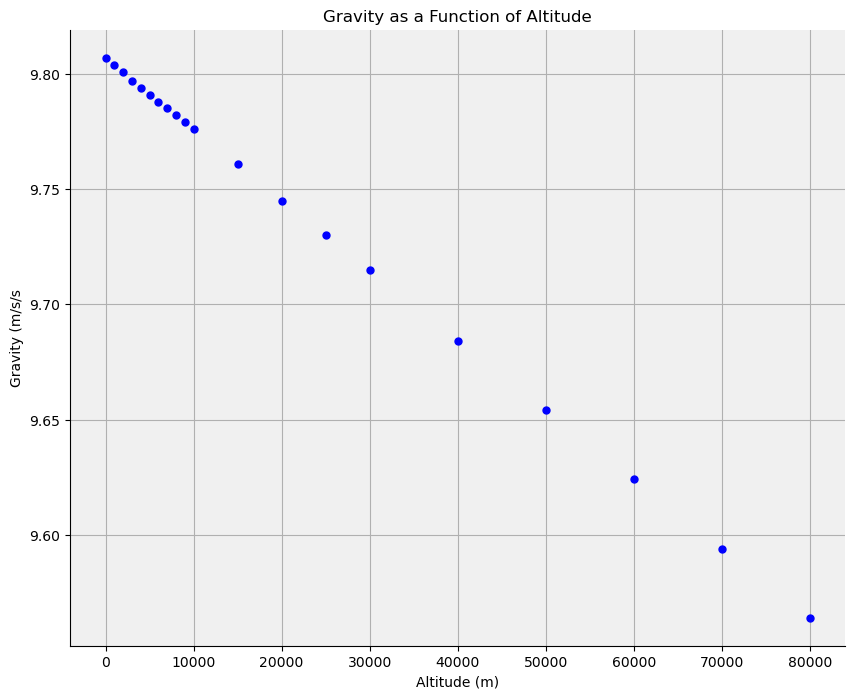

In [66]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, gravity, yerr=gravity_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s/s")
#plt.yscale("log")

Fit the data with the pre-defined function

In [67]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [12.0,-0.0001]
else:
    init_vals = [12.0,-0.0001, -0.000001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 9.80661109e+00 -3.13369232e-07]
[[ 8.37873480e-09 -1.77979970e-14]
 [-1.77979970e-14  8.29152899e-20]]


In [68]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.618E-06 / 18


Draw the graph

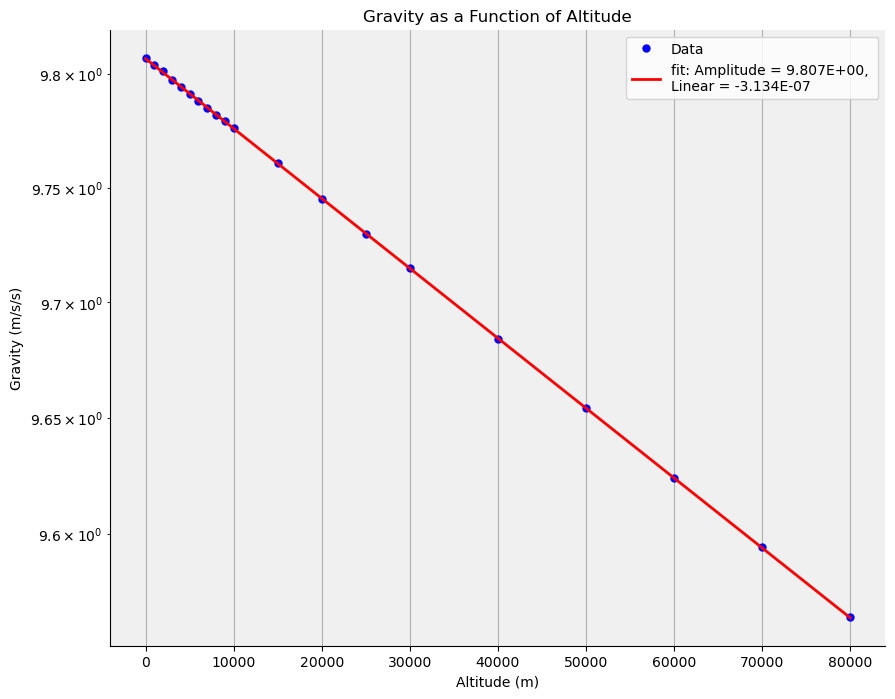

In [69]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Gravity (m/s/s)")
plt.yscale("log")
plt.legend()

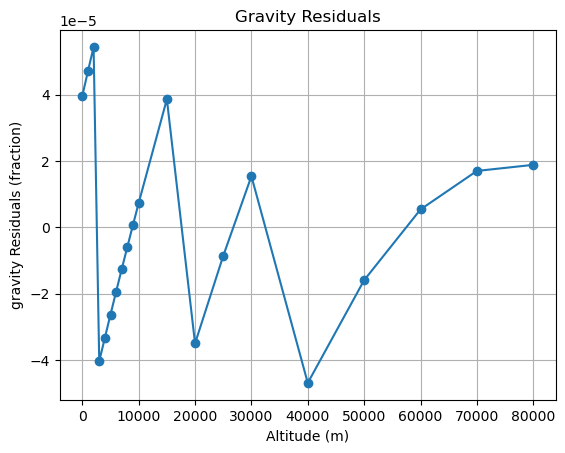

In [70]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt))/gravity, 'o-')

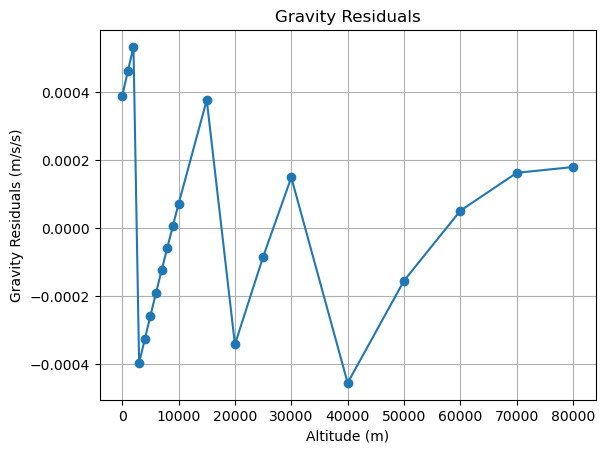

In [71]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s/s)')
plt.grid(True)

plt.plot(altitude, (gravity - fitfunction(altitude, *popt)), 'o-')
residuals = (gravity - fitfunction(altitude, *popt))
popt_exponential = popt

In [72]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)


In [73]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [74]:
print (popt, pcov)

[ 5.33478173e-04 -2.98844329e-07  4.44548234e-11 -2.75411759e-15
  8.44644838e-20 -1.36561486e-24  1.11974234e-29 -3.67644702e-35] [[ 4.66203773e-08 -2.24016822e-11  3.34969715e-15 -2.19100303e-19
   7.25405777e-24 -1.27085222e-28  1.12287145e-33 -3.93680703e-39]
 [-2.24016822e-11  1.69149771e-14 -3.02131908e-18  2.15606994e-22
  -7.50794183e-27  1.35888249e-31 -1.22807880e-36  4.37714629e-42]
 [ 3.34969715e-15 -3.02131908e-18  5.87436732e-22 -4.38718851e-26
   1.57174894e-30 -2.90062087e-35  2.65868017e-40 -9.57771762e-46]
 [-2.19100303e-19  2.15606994e-22 -4.38718851e-26  3.37251623e-30
  -1.23303882e-34  2.31010441e-39 -2.14204869e-44  7.78704157e-50]
 [ 7.25405777e-24 -7.50794183e-27  1.57174894e-30 -1.23303882e-34
   4.57830479e-39 -8.68121179e-44  8.12671478e-49 -2.97703936e-54]
 [-1.27085222e-28  1.35888249e-31 -2.90062087e-35  2.31010441e-39
  -8.68121179e-44  1.66205440e-48 -1.56807879e-53  5.78099111e-59]
 [ 1.12287145e-33 -1.22807880e-36  2.65868017e-40 -2.14204869e-44
   8.

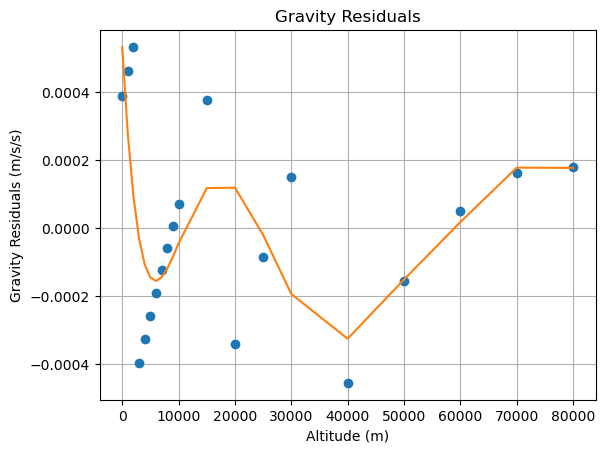

In [75]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (m/s/s)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [76]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [77]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [78]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, gravity, sigma=gravity_uncertainty, absolute_sigma=True, p0=init_vals)

In [79]:
print (popt, pcov)

[ 9.80661109e+00 -3.13369232e-07  5.33478173e-04 -2.98844329e-07
  4.44548234e-11 -2.75411759e-15  8.44644838e-20 -1.36561486e-24
  1.11974234e-29 -3.67644702e-35] [[ 1.46548742e+02  1.82724042e-04 -1.46552557e+02 -1.74701561e-03
   8.29541215e-10 -2.73808139e-14  1.25280550e-18 -2.86466589e-23
   3.15923323e-28 -1.33359434e-33]
 [ 1.82724042e-04  3.09368172e-09 -1.82729682e-04 -3.02816051e-08
   9.71026031e-15 -3.41949654e-20  1.86542987e-24 -4.79502153e-29
   5.65592546e-34 -2.48582401e-39]
 [-1.46552557e+02 -1.82729682e-04  1.46556371e+02  1.74706972e-03
  -8.29561463e-10  2.73812638e-14 -1.25282950e-18  2.86472558e-23
  -3.15930251e-28  1.33362458e-33]
 [-1.74701561e-03 -3.02816051e-08  1.74706972e-03  2.96415419e-07
  -9.49713755e-14  3.27208576e-19 -1.79187148e-23  4.61613537e-28
  -5.45119432e-33  2.39740037e-38]
 [ 8.29541215e-10  9.71026031e-15 -8.29561463e-10 -9.49713755e-14
   3.16654888e-20 -2.07789870e-25  9.89565287e-30 -2.33987415e-34
   2.62703045e-39 -1.11896161e-44]
 

Chi^2 / dof = 8.901E-07 / 10


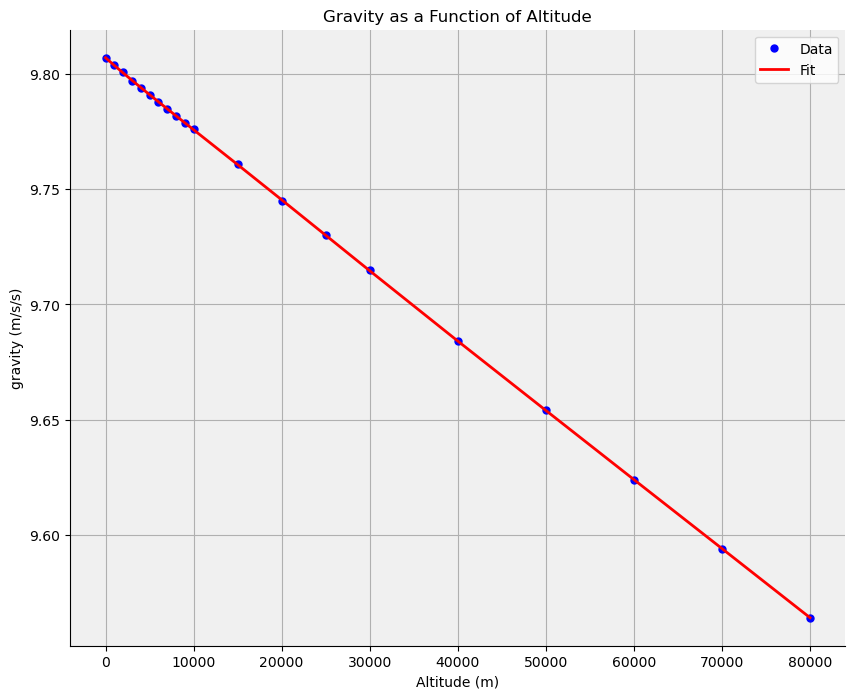

In [80]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, gravity, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("gravity (m/s/s)")
#plt.yscale("log")
plt.legend()